In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from lmfit import Parameters
from lmfit import minimize
from ResoFit._gap_functions import gap_neutron_pulse_ikeda_carpenter
from ResoFit._gap_functions import gap_neutron_pulse_cole_windsor
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from ResoFit.model import ikeda_carpenter
import pprint

In [2]:
path1 = '/Users/Shawn/Dropbox (ORNL)/Postdoc_research/pulse_shape/source_section_1.dat'
path2 = '/Users/Shawn/Dropbox (ORNL)/Postdoc_research/pulse_shape/source_section_2.dat'
# path1 = '/Users/y9z/Dropbox (ORNL)/Postdoc_Research/pulse_shape/source_section_1.dat'
# path2 = '/Users/y9z/Dropbox (ORNL)/Postdoc_Research/pulse_shape/source_section_2.dat'

In [3]:
neutron_pulse = NeutronPulse(path1)
neutron_pulse.load_shape_each(path2)
# neutron_pulse.export_total()
# neutron_pulse.export_each()

In [4]:
f = np.array(neutron_pulse.shape_dict[1]['f_norm'])
t = np.array(neutron_pulse.shape_dict[1]['t_us'])

In [14]:
my_model = Model(ikeda_carpenter)
print("Parameters: ", my_model.param_names)
print("Independent variable: ", my_model.independent_vars)

my_model.set_param_hint('alpha', value=0.699, min=0, max=20)
my_model.set_param_hint('beta', value=0.0215, min=0, max=20)
my_model.set_param_hint('fraction', value=0.383, min=0, max=1)
my_model.set_param_hint('t0', value=0.0889, min=0, max=20)
my_model.set_param_hint('norm_factor', value=1, min=0, vary=False)
params = my_model.make_params(verbose=True)

# my_model.print_param_hints()
print("+----------------- Fit neutron pulse shape -----------------+\nParams before:")
params.pretty_print()

Parameters:  ['alpha', 'beta', 'fraction', 't0', 'norm_factor']
Independent variable:  ['t']
 - Adding parameter "alpha"
 - Adding parameter "beta"
 - Adding parameter "fraction"
 - Adding parameter "t0"
 - Adding parameter "norm_factor"
+----------------- Fit neutron pulse shape -----------------+
Params before:
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha           0.699        0       20     None     True     None     None
beta           0.0215        0       20     None     True     None     None
fraction        0.383        0        1     None     True     None     None
norm_factor         1        0      inf     None    False     None     None
t0             0.0889        0       20     None     True     None     None


In [6]:
my_model.param_names

['alpha', 'beta', 'fraction', 't0', 'norm_factor']

In [7]:
my_model.independent_vars


['t']

In [15]:
result = my_model.fit(f, params, t=t)

In [9]:
result.init_params

Parameters([('alpha', <Parameter 'alpha', 0.699, bounds=[0:20]>),
            ('beta', <Parameter 'beta', 0.0215, bounds=[0:20]>),
            ('fraction', <Parameter 'fraction', 0.383, bounds=[0:1]>),
            ('t0', <Parameter 't0', 0.0889, bounds=[0:20]>),
            ('norm_factor', <Parameter 'norm_factor', 1, bounds=[0:inf]>)])

In [10]:
result.init_values

{'alpha': 0.699,
 'beta': 0.0215,
 'fraction': 0.383,
 'norm_factor': 1,
 't0': 0.0889}

In [11]:
result.best_values

{'alpha': 1.3201611940897484,
 'beta': 0.19087367422726764,
 'fraction': 0.25858488857583906,
 'norm_factor': 3.5269348536013689,
 't0': 1.2392710709129062}

In [16]:
result.best_values

{'alpha': 2.8794140386847467,
 'beta': 2.8671922871718958,
 'fraction': 0.96637147423803849,
 'norm_factor': 1,
 't0': 1.4980977960295161}

In [12]:
result.params

Parameters([('alpha',
             <Parameter 'alpha', value=1.3201611940897484 +/- 0.0108, bounds=[0:20]>),
            ('beta',
             <Parameter 'beta', value=0.19087367422726764 +/- 0.0166, bounds=[0:20]>),
            ('fraction',
             <Parameter 'fraction', value=0.25858488857583906 +/- 0.00883, bounds=[0:1]>),
            ('t0',
             <Parameter 't0', value=1.2392710709129062 +/- 0.00476, bounds=[0:20]>),
            ('norm_factor',
             <Parameter 'norm_factor', value=3.5269348536013689 +/- 0.0326, bounds=[0:inf]>)])

In [12]:
print(result.fit_report())

[[Model]]
    Model(ikeda_carpenter)
[[Fit Statistics]]
    # function evals   = 79
    # data points      = 184
    # variables        = 5
    chi-square         = 0.009
    reduced chi-square = 0.000
    Akaike info crit   = -1807.325
    Bayesian info crit = -1791.250
[[Variables]]
    alpha:         1.32016119 +/- 0.010750 (0.81%) (init= 0.699)
    beta:          0.19087367 +/- 0.016616 (8.71%) (init= 0.0215)
    fraction:      0.25858488 +/- 0.008827 (3.41%) (init= 0.383)
    t0:            1.23927107 +/- 0.004764 (0.38%) (init= 0.0889)
    norm_factor:   3.52693485 +/- 0.032596 (0.92%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(beta, norm_factor)         = -0.797 
    C(alpha, t0)                 =  0.734 
    C(alpha, fraction)           =  0.730 
    C(alpha, beta)               =  0.714 
    C(fraction, t0)              =  0.460 
    C(alpha, norm_factor)        = -0.376 
    C(beta, t0)                  =  0.338 
    C(beta, fraction)            =

In [17]:
print(result.fit_report())

[[Model]]
    Model(ikeda_carpenter)
[[Fit Statistics]]
    # function evals   = 95
    # data points      = 184
    # variables        = 4
    chi-square         = 3.657
    reduced chi-square = 0.020
    Akaike info crit   = -712.944
    Bayesian info crit = -700.084
[[Variables]]
    alpha:         2.87941403 +/- 0.893377 (31.03%) (init= 0.699)
    beta:          2.86719228 +/- 2.124455 (74.10%) (init= 0.0215)
    fraction:      0.96637147 +/- 4.047421 (418.83%) (init= 0.383)
    t0:            1.49809779 +/- 1.296978 (86.58%) (init= 0.0889)
    norm_factor:   1 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(fraction, t0)              = -0.997 
    C(alpha, beta)               = -0.778 
    C(beta, t0)                  = -0.404 
    C(beta, fraction)            =  0.366 
    C(alpha, fraction)           =  0.155 



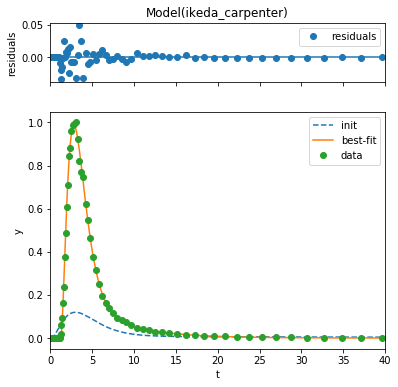

In [13]:
result.plot()
plt.xlim(left=0,
         right=40)
plt.show()

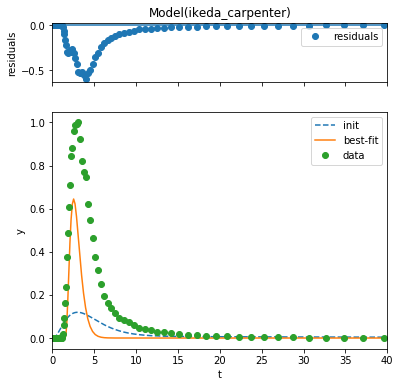

In [18]:
result.plot()
plt.xlim(left=0,
         right=40)
plt.show()

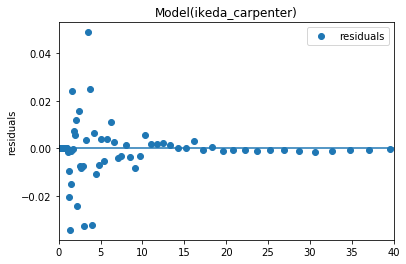

In [28]:
result.plot_residuals()
plt.xlim(left=0,
         right=40)
plt.show()

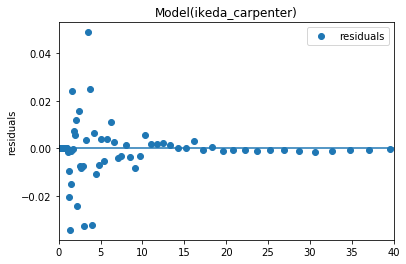

In [16]:
result.plot_residuals()
plt.xlim(left=0,
         right=40)
plt.show()

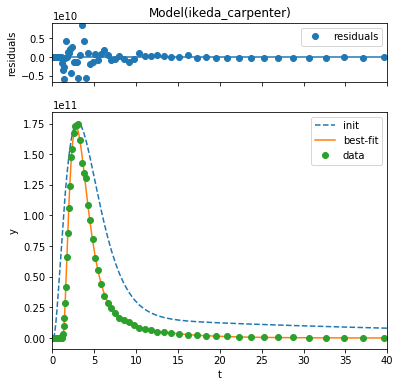

In [52]:
result = my_model.fit(f, params, t=t)
result.plot()
plt.xlim(left=0,
         right=40)
plt.show()

In [56]:
result.conf_interval()

OrderedDict([('alpha',
              [(0.99730020393673979, 1.2890802533725827),
               (0.95449973610364158, 1.299096208117712),
               (0.68268949213708585, 1.3094116478333886),
               (0.0, 1.3201634913494398),
               (0.68268949213708585, 1.3315096383832874),
               (0.95449973610364158, 1.3436199918850462),
               (0.99730020393673979, 1.3567915437928513)]),
             ('beta',
              [(0.99730020393673979, 0.1451245992954457),
               (0.95449973610364158, 0.15956686668332112),
               (0.68268949213708585, 0.17476164365706368),
               (0.0, 0.19087510363506699),
               (0.68268949213708585, 0.208117581170108),
               (0.95449973610364158, 0.2267379820030989),
               (0.99730020393673979, 0.2470499136166407)]),
             ('fraction',
              [(0.99730020393673979, 0.2810403784546158),
               (0.95449973610364158, 0.29255216595603617),
               (0.682689492

In [58]:
print(result.ci_report())

                99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 alpha      :  -0.03108  -0.02107  -0.01075   1.32016  +0.01135  +0.02346  +0.03663
 beta       :  -0.04575  -0.03131  -0.01611   0.19088  +0.01724  +0.03586  +0.05617
 fraction   :  -0.03423  -0.02272  -0.01136   0.31527  +0.01155  +0.02351  +0.03619
 t0         :  -0.01528  -0.01013  -0.00504   1.23927  +0.00505  +0.01019  +0.01539
 norm_factor:-19899217634.16748-13334847256.77466-6731555087.51306667854035084.67749+6934820238.98303+14176649133.37402+21842974730.58142


In [59]:
result.eval_uncertainty()

array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   5.91875192e+007,   3.54644822e+008,
         5.14937220e+008,   5.72597796e+008,   5.62156122e+008,
         5.19563819e+008,   4.78675274e+

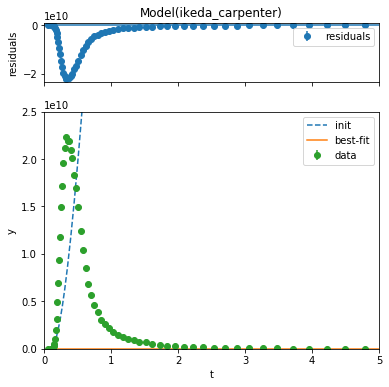

In [77]:
result.plot(yerr=True)
plt.xlim(xmin=0, xmax=5)
plt.ylim(ymin=0, ymax=2.5e10)

plt.show()